# The Eras of MLB Baseball

Throughout the history of Major League baseball, the game has changed and developed. This notebook displays how certain statistics have changed based on the different eras of baseball. There eight different eras of Major League baseball. 
- [<i>19th Century Era (1871-1900)</i>](https://www.baseball-reference.com/bullpen/19th_Century)- The beginning of baseball 
- [<i>Dead Ball Era (1901-1919)</i>](https://www.baseball-reference.com/bullpen/Deadball_Era)- era highly focused on pitching and defense
- [<i>Lively Ball Era (1920-1941)</i>](https://www.baseball-reference.com/bullpen/Lively_ball_era)- era of increased offense
- [<i>Integration Era (1942-1960)</i>](https://www.baseball-reference.com/bullpen/Integration)- integration of MLB
- [<i>Expansion Era (1961-1976)</i>](https://en.wikipedia.org/wiki/1961_Major_League_Baseball_expansion)- addition of two more teams to both the National and American Leagues
- [<i>Free Agency Era (1977-1993)</i>](https://news.illinois.edu/blog/view/6367/198486)- free agency is introduced in MLB
- [<i>Steroid Era (1994-2005)</i>](http://www.espn.com/mlb/topics/_/page/the-steroids-era)- increased offense and widley used PEDs
- <i>Modern Era (2006-Present)</i> - present day MLB

The database used is Sean Lahman's History of Baseball database. It holds all seasonal statistics from every player that has played in Major League Baseball from 1871 to 2015. In this project only the regular season batting and pitching tabels were used. 

In [2]:
%matplotlib inline

In [28]:
import pandas as pd
from pylab import *
from sqlalchemy import create_engine
import itertools
import matplotlib.patches as mpatches

# Create connection.
engine = create_engine('sqlite:///:memory:')

In [4]:
batting = pd.DataFrame.from_csv('baseball/batting.csv', index_col = None, encoding = 'utf-8')
batting.head()

,player_id,year,stint,team_id,league_id,g,ab,r,h,double,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN


In [5]:
batting.to_sql('batting', engine, index = False)

In [6]:
pd.read_sql_table('batting', engine).head()

,player_id,year,stint,team_id,league_id,g,ab,r,h,double,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp
0,abercda01,1871,1,TRO,None,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,None,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,None,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,None,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,None,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN


In [7]:
#Queries to pull data for league wide HR and AVG by year
total_hr = pd.read_sql_query('SELECT year, SUM(hr) AS total_hr FROM batting GROUP BY year', engine)
total_avg = pd.read_sql_query('SELECT year, SUM(ab) AS total_ab, SUM(h) AS total_h FROM batting GROUP BY year', engine)

In [8]:
#Adding a column to calculate league wide batting average.
ab = total_avg['total_ab']
h = total_avg['total_h']
total_avg['avg'] = (h / ab)
total_avg.head()

,year,total_ab,total_h,avg
0,1871,10822.0,3101.0,0.286546
1,1872,15679.0,4487.0,0.286179
2,1873,16974.0,4923.0,0.290032
3,1874,19104.0,5226.0,0.273555
4,1875,26833.0,6812.0,0.253867


In [9]:
fig = plt.figure(figsize=(8,4), dpi=100)

In [10]:
year = total_hr['year']
hr = total_hr['total_hr']
year_avg = total_avg['year']
avg = total_avg['avg']

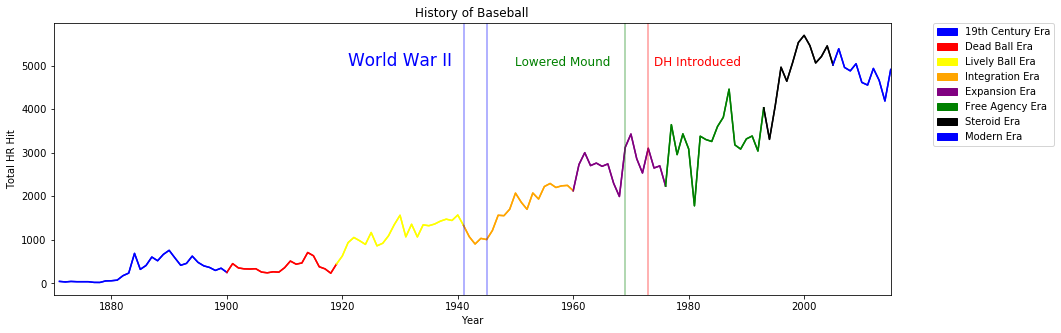

In [45]:
#Total Home Runs by year
fig, axes = plt.subplots(1,1, figsize = (15, 5))

for x in total_hr :
    axes.plot(year[(year <= 1900)], hr[(year <= 1900)], color="blue", label = '19th Century Era')
    axes.plot(year[(year >= 1900) & (year <= 1919)], hr[(year >= 1900) & (year <= 1919)], color="red", label = 'Dead Ball Era')
    axes.plot(year[(year >= 1919) & (year <= 1941)], hr[(year >= 1919) & (year <= 1941)], color="yellow", label = 'Lively Ball Era')
    axes.plot(year[(year >= 1941) & (year <= 1960)], hr[(year >= 1941) & (year <= 1960)], color="orange", label = 'Integration Era')
    axes.plot(year[(year >= 1960) & (year <= 1976)], hr[(year >= 1960) & (year <= 1976)], color="purple", label = 'Expansion Era')
    axes.plot(year[(year >= 1976) & (year <= 1993)], hr[(year >= 1976) & (year <= 1993)], color="green", label = 'Free Agency Era')
    axes.plot(year[(year >= 1993) & (year <= 2005)], hr[(year >= 1993) & (year <= 2005)], color="black", label = 'Steroid Era')
    axes.plot(year[(year >= 2005)], hr[(year >= 2005)], color="blue", label = 'Modern Era')
    
axes.text(1921, 5000, 'World War II', fontsize=17, color="blue")
axes.text(1950, 5000, 'Lowered Mound', fontsize=12, color="green")
axes.text(1974, 5000, 'DH Introduced', fontsize=12, color="red")

era_1 = mpatches.Patch(color='blue', label='19th Century Era')
era_2 = mpatches.Patch(color='red', label='Dead Ball Era')
era_3 = mpatches.Patch(color='yellow', label='Lively Ball Era')
era_4 = mpatches.Patch(color='orange', label='Integration Era')
era_5 = mpatches.Patch(color='purple', label='Expansion Era')
era_6 = mpatches.Patch(color='green', label='Free Agency Era')
era_7 = mpatches.Patch(color='black', label='Steroid Era')
era_8 = mpatches.Patch(color='blue', label='Modern Era')
plt.legend(handles=[era_1, era_2, era_3, era_4, era_5, era_6, era_7, era_8], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

axes.set_xlabel('Year')
axes.set_ylabel('Total HR Hit')
axes.set_title('History of Baseball')
axes.set_xlim([1870, 2015])
axes.set_xlim([1870, 2015])

#WWII
plt.axvline(x = 1941, alpha = .4, color = 'blue')
plt.axvline(x = 1945, alpha = .4, color = 'blue')

#Lowered Mound
plt.axvline(x = 1969, alpha = .4, color = 'green')

#DH
plt.axvline(x = 1973, alpha = .4, color = 'red')

The progression of home runs is obvious from the graph shown above. The first spike in home runs on the 19th Century Era was result of the pitching mound being pushed back to the leangth today of 60 feet 6 inches. During the Dead Ball Era, pitching a defense was emphasized. This obvious due to the low amount of league wide home runs hit. In the transition into the Lively Ball Era, home runs increase immediatley. Offense began taking over as the main focus of the league in this era. Home runs took a dive when World War II. Many of the [MLB's best players](http://www.baseballinwartime.com/those_who_served/those_who_served_atoz.htm) took up arms and went to war. With most of the best players gone, older players or less experienced players took their places after [Franklin D. Roosevelt requested Judge Kenesaw Mountain Landis, the commissioner of baseball](http://ftw.usatoday.com/2014/01/fdr-franklin-roosevelt-letter-to-mlb-commissioner-kenesaw-landis). Once World War II was over, the MLB began to integrate itself. With the addition of amazing talent like Jackie Robinson and Larry Doby, home runs increased again. Home runs increased during the Expansion Era due to the addition of four more teams. With more personel going to bat than ever before home runs were bound to increase. The green line on the graph represents when the mound was lowered and the strike zone shrunk for the 1969 season. It was believed by the league that the pitchers were too good and had too much of an upper hand against hitters. During the Free Agency Era there is a massive drop in the 1981 season. [This was due to a players strike](https://en.wikipedia.org/wiki/1981_Major_League_Baseball_strike). Some of the leagues top hitters were involved in the strike and some games were cancelled, causing the dip in home runs. 2005 was the first year of the Steroid Era. There was an enourmous increase in home runs. With steroids running through the league, players' power increased, increasing the amount of home runs hit. 

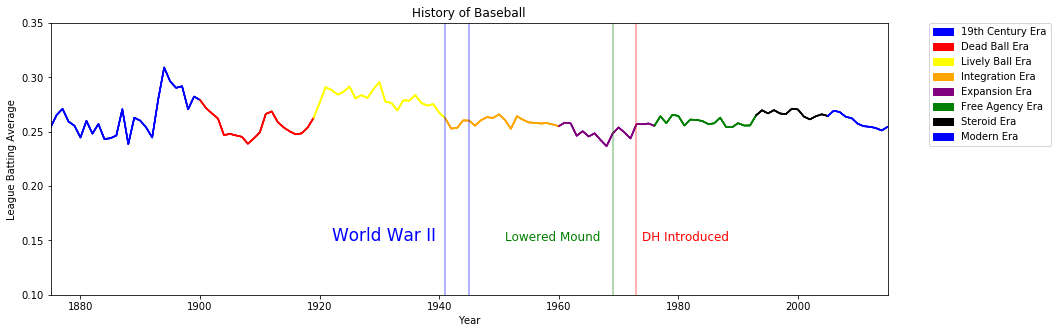

In [50]:
#League wide batting average by year
fig, axes = plt.subplots(figsize = (15, 5))

for x in total_avg :
    axes.plot(year_avg[(year_avg <= 1900)], avg[(year_avg <= 1900)], color="blue", label = '19th Century Era')
    axes.plot(year_avg[(year_avg >= 1900) & (year_avg <= 1919)], avg[(year_avg >= 1900) & (year_avg <= 1919)], color="red", label = 'Dead Ball Era')
    axes.plot(year_avg[(year_avg >= 1919) & (year_avg <= 1941)], avg[(year_avg >= 1919) & (year_avg <= 1941)], color="yellow", label = 'Lively Ball Era')
    axes.plot(year_avg[(year_avg >= 1941) & (year_avg <= 1960)], avg[(year_avg >= 1941) & (year_avg <= 1960)], color="orange", label = 'Integration Era')
    axes.plot(year_avg[(year_avg >= 1960) & (year_avg <= 1976)], avg[(year_avg >= 1960) & (year_avg <= 1976)], color="purple", label = 'Expansion Era')
    axes.plot(year_avg[(year_avg >= 1976) & (year_avg <= 1993)], avg[(year_avg >= 1976) & (year_avg <= 1993)], color="green", label = 'Free Agency Era')
    axes.plot(year_avg[(year_avg >= 1993) & (year_avg <= 2005)], avg[(year_avg >= 1993) & (year_avg <= 2005)], color="black", label = 'Steroid Era')
    axes.plot(year_avg[(year_avg >= 2005)], avg[(year_avg >= 2005)], color="blue", label = 'Modern Era')
    axes.legend(loc = 1, ncol = 2)    

era_1 = mpatches.Patch(color='blue', label='19th Century Era')
era_2 = mpatches.Patch(color='red', label='Dead Ball Era')
era_3 = mpatches.Patch(color='yellow', label='Lively Ball Era')
era_4 = mpatches.Patch(color='orange', label='Integration Era')
era_5 = mpatches.Patch(color='purple', label='Expansion Era')
era_6 = mpatches.Patch(color='green', label='Free Agency Era')
era_7 = mpatches.Patch(color='black', label='Steroid Era')
era_8 = mpatches.Patch(color='blue', label='Modern Era')
plt.legend(handles=[era_1, era_2, era_3, era_4, era_5, era_6, era_7, era_8], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

axes.set_title('History of Baseball')
axes.set_xlabel('Year')
axes.set_ylabel('League Batting Average')
axes.set_xlim([1875, 2015])
axes.set_ylim([.1, .35])

#WWII
plt.axvline(x = 1941, alpha = .4, color = 'blue')
plt.axvline(x = 1945, alpha = .4, color = 'blue')

#Lowered Mound
plt.axvline(x = 1969, alpha = .4, color = 'green')

#DH
plt.axvline(x = 1973, alpha = .4, color = 'red')

axes.text(1922, .15, 'World War II', fontsize=17, color="blue")
axes.text(1951, .15, 'Lowered Mound', fontsize=12, color="green")
axes.text(1974, .15, 'DH Introduced', fontsize=12, color="red")

When observing the history of league wide averages, the first thing that pops out is how high the averages were between 1890 and 1900, as well as in the Lively Ball Era. Comparing the averages to the home runs hit in these time periods, there is an obvious mismatch. The total home runs hit were some of the lowest in history but averages were some of the highest. This proves the shift in the culture of baseball. In the early years of baseball, hitters were more contact conscious than power conscious. This information should be taken into account when comparing players of different eras.

In [14]:
#Load pitching data
pitching = pd.DataFrame.from_csv('baseball/pitching.csv', index_col = None, encoding = 'utf-8')
pitching.head()

,player_id,year,stint,team_id,league_id,w,l,g,gs,cg,...,ibb,wp,hbp,bk,bfp,gf,r,sh,sf,g_idp
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,NaN,NaN,0,NaN,NaN,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,NaN,NaN,0,NaN,NaN,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,NaN,NaN,0,NaN,NaN,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,NaN,NaN,0,NaN,NaN,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,NaN,NaN,0,NaN,NaN,21,NaN,NaN,NaN


In [15]:
pitching.to_sql('pitching', engine, index = False)
pd.read_sql_table('pitching', engine).head()

,player_id,year,stint,team_id,league_id,w,l,g,gs,cg,...,ibb,wp,hbp,bk,bfp,gf,r,sh,sf,g_idp
0,bechtge01,1871,1,PH1,None,1,2,3,3,2,...,NaN,NaN,NaN,0,NaN,NaN,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,None,12,15,30,30,30,...,NaN,NaN,NaN,0,NaN,NaN,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,None,0,0,1,0,0,...,NaN,NaN,NaN,0,NaN,NaN,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,None,4,16,24,24,22,...,NaN,NaN,NaN,0,NaN,NaN,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,None,0,1,1,1,1,...,NaN,NaN,NaN,0,NaN,NaN,21,NaN,NaN,NaN


In [16]:
#Query to pull data for ERA
df_era = pd.read_sql_query('SELECT year, SUM(er) AS total_er, SUM(ipouts) / 3 as total_ip FROM pitching GROUP BY year', engine)
df_era.head()

,year,total_er,total_ip
0,1871,1055,2250.000000
1,1872,1357,3285.333333
2,1873,1295,3584.666667
3,1874,1399,4172.666667
4,1875,1692,6192.333333


The database did not already have each pitchers era, so it needed to be calcualted with this fourmula:

<i>Earned Run Average = (Earned Runs / Innings Pitched) x 9</i>

In [17]:
#Calculations for league wide ERA
df_era['yr_era'] = (df_era['total_er'] / df_era['total_ip']) * 9
year = df_era['year']
era = df_era['yr_era']
df_era.head()

,year,total_er,total_ip,yr_era
0,1871,1055,2250.000000,4.220000
1,1872,1357,3285.333333,3.717431
2,1873,1295,3584.666667,3.251348
3,1874,1399,4172.666667,3.017495
4,1875,1692,6192.333333,2.459170


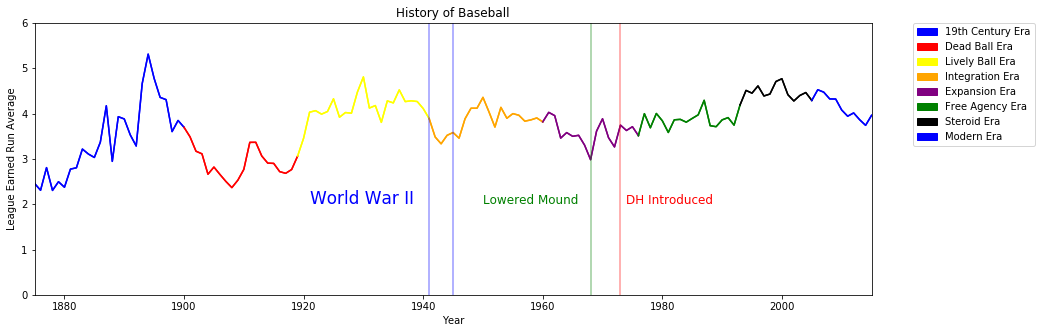

In [37]:
#League ERA by year
fig, axes = plt.subplots(figsize = (15, 5))

for x in total_hr :
    axes.plot(year[(year <= 1900)], era[(year <= 1900)], color="blue", label = '19th Century Era')
    axes.plot(year[(year >= 1900) & (year <= 1919)], era[(year >= 1900) & (year <= 1919)], color="red", label = 'Dead Ball Era')
    axes.plot(year[(year >= 1919) & (year <= 1941)], era[(year >= 1919) & (year <= 1941)], color="yellow", label = 'Lively Ball Era')
    axes.plot(year[(year >= 1941) & (year <= 1960)], era[(year >= 1941) & (year <= 1960)], color="orange", label = 'Integration Era')
    axes.plot(year[(year >= 1960) & (year <= 1976)], era[(year >= 1960) & (year <= 1976)], color="purple", label = 'Expansion Era')
    axes.plot(year[(year >= 1976) & (year <= 1993)], era[(year >= 1976) & (year <= 1993)], color="green", label = 'Free Agency Era')
    axes.plot(year[(year >= 1993) & (year <= 2005)], era[(year >= 1993) & (year <= 2005)], color="black", label = 'Steroid Era')
    axes.plot(year[(year >= 2005)], era[(year >= 2005)], color="blue", label = 'Modern Era')

axes.set_xlabel('Year')
axes.set_title('History of Baseball')
axes.set_ylabel('League Earned Run Average')
axes.set_xlim([1875, 2015])
axes.set_ylim([0, 6])

era_1 = mpatches.Patch(color='blue', label='19th Century Era')
era_2 = mpatches.Patch(color='red', label='Dead Ball Era')
era_3 = mpatches.Patch(color='yellow', label='Lively Ball Era')
era_4 = mpatches.Patch(color='orange', label='Integration Era')
era_5 = mpatches.Patch(color='purple', label='Expansion Era')
era_6 = mpatches.Patch(color='green', label='Free Agency Era')
era_7 = mpatches.Patch(color='black', label='Steroid Era')
era_8 = mpatches.Patch(color='blue', label='Modern Era')
plt.legend(handles=[era_1, era_2, era_3, era_4, era_5, era_6, era_7, era_8], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

axes.text(1921, 2, 'World War II', fontsize=17, color="blue")
axes.text(1950, 2, 'Lowered Mound', fontsize=12, color="green")
axes.text(1974, 2, 'DH Introduced', fontsize=12, color="red")

#WWII
plt.axvline(x = 1941, alpha = .4, color = 'blue')
plt.axvline(x = 1945, alpha = .4, color = 'blue')

#Lowered Mound
plt.axvline(x = 1968, alpha = .4, color = 'green')

#DH
plt.axvline(x = 1973, alpha = .4, color = 'red')



After observing league wide ERA by year, there seams to be a relationship between ERA and batting average. This would make sense because the more the ball is in play, the more oppurtunites the offense has to score.

In [19]:
#Query to pull total league strikeouts
df_so = pd.read_sql_query('SELECT year, SUM(so) AS so FROM pitching GROUP BY year', engine)
year = df_so['year']
so = df_so['so']
df_so.head()

,year,so
0,1871,175
1,1872,252
2,1873,240
3,1874,192
4,1875,387


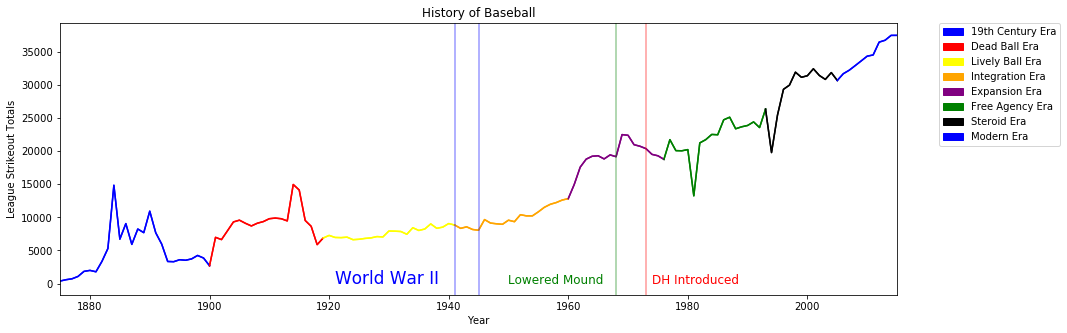

In [38]:
#Total strikeouts by year
fig, axes = plt.subplots(figsize = (15, 5))

for x in total_hr :
    axes.plot(year[(year <= 1900)], so[(year <= 1900)], color="blue", label = '19th Century Era')
    axes.plot(year[(year >= 1900) & (year <= 1919)], so[(year >= 1900) & (year <= 1919)], color="red", label = 'Dead Ball Era')
    axes.plot(year[(year >= 1919) & (year <= 1941)], so[(year >= 1919) & (year <= 1941)], color="yellow", label = 'Lively Ball Era')
    axes.plot(year[(year >= 1941) & (year <= 1960)], so[(year >= 1941) & (year <= 1960)], color="orange", label = 'Integration Era')
    axes.plot(year[(year >= 1960) & (year <= 1976)], so[(year >= 1960) & (year <= 1976)], color="purple", label = 'Expansion Era')
    axes.plot(year[(year >= 1976) & (year <= 1993)], so[(year >= 1976) & (year <= 1993)], color="green", label = 'Free Agency Era')
    axes.plot(year[(year >= 1993) & (year <= 2005)], so[(year >= 1993) & (year <= 2005)], color="black", label = 'Steroid Era')
    axes.plot(year[(year >= 2005)], so[(year >= 2005)], color="blue", label = 'Modern Era')

axes.set_title('History of Baseball')
axes.set_xlabel('Year')
axes.set_ylabel('League Strikeout Totals')
axes.set_xlim([1875, 2015])

era_1 = mpatches.Patch(color='blue', label='19th Century Era')
era_2 = mpatches.Patch(color='red', label='Dead Ball Era')
era_3 = mpatches.Patch(color='yellow', label='Lively Ball Era')
era_4 = mpatches.Patch(color='orange', label='Integration Era')
era_5 = mpatches.Patch(color='purple', label='Expansion Era')
era_6 = mpatches.Patch(color='green', label='Free Agency Era')
era_7 = mpatches.Patch(color='black', label='Steroid Era')
era_8 = mpatches.Patch(color='blue', label='Modern Era')
plt.legend(handles=[era_1, era_2, era_3, era_4, era_5, era_6, era_7, era_8], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

axes.text(1921, 2, 'World War II', fontsize=17, color="blue")
axes.text(1950, 2, 'Lowered Mound', fontsize=12, color="green")
axes.text(1974, 2, 'DH Introduced', fontsize=12, color="red")

#WWII
plt.axvline(x = 1941, alpha = .4, color = 'blue')
plt.axvline(x = 1945, alpha = .4, color = 'blue')

#Lowered Mound
plt.axvline(x = 1968, alpha = .4, color = 'green')

#DH
plt.axvline(x = 1973, alpha = .4, color = 'red')


Just like batting average and ERA, total strikeouts and home runs share a relationship over the history of baseball. This can be attributed to the culture shift in baseball. When swinging for the fences, batters take more of a risk of swinging and missing. Taking this risk has rewarded batters wit hmore home runs but they have suffered the consequences of striking out more.